In [72]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import itertools
import os, stat, time
from os.path import dirname as up
import shutil
import glob
from PIL import Image

In [73]:
from glob import glob
data = glob('breast_cancer/train_imgs/BC*.png', recursive=True)
test = glob('breast_cancer/test_imgs/BC*.png', recursive=True)

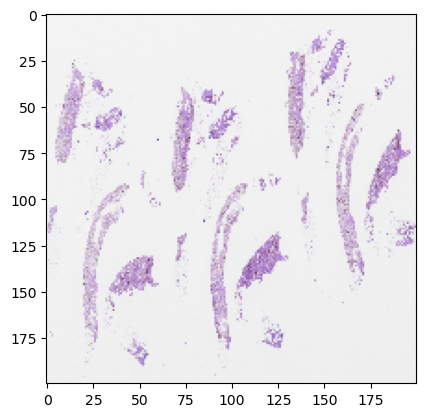

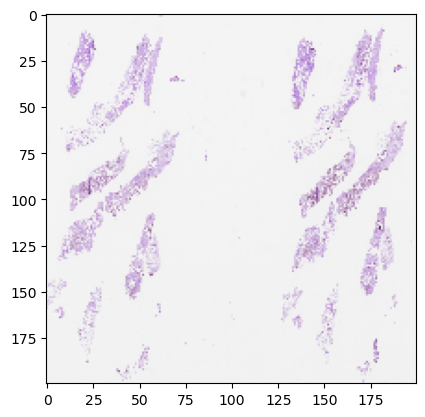

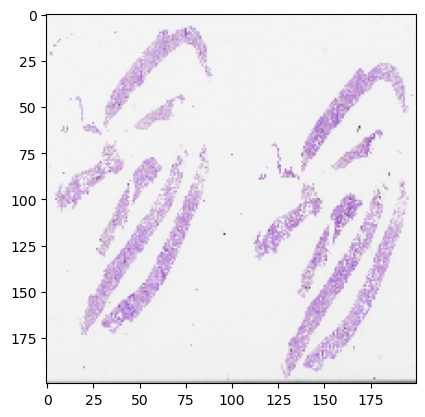

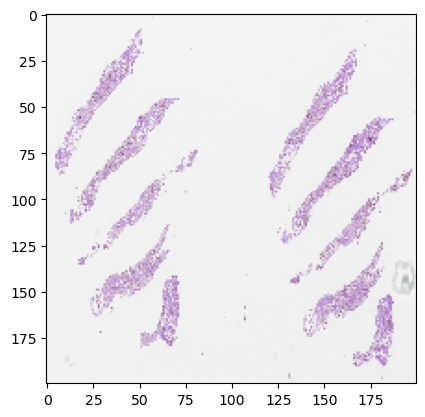

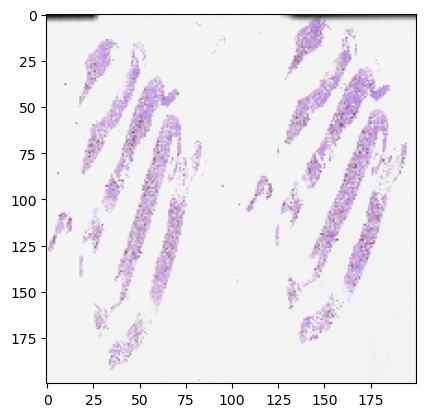

In [74]:
import cv2
import matplotlib.pyplot as plt
for i in data[:5]:
    img=cv2.imread(i)
    img_1=cv2.resize(img,(200,200))
    plt.imshow(img_1,cmap='binary')
    plt.show()

In [75]:
images=[]
labels=[]
for i in data[:100]:
    if i.endswith('.png'):
        label=i[-5]
        img=cv2.imread(i)
        img_1=cv2.resize(img,(100,100))
        images.append(img_1)
        labels.append(label)

In [76]:
x=np.stack(images)

In [77]:
from tensorflow.keras.utils import to_categorical
y=to_categorical(labels)

In [78]:
x=x/100

In [79]:
images_test=[]
labels_test=[]
for i in test[:100]:
    if i.endswith('.png'):
        label_test=i[-5]
        img_test=cv2.imread(i)
        img_1_test=cv2.resize(img_test,(100,100))
        images_test.append(img_1_test)
        labels_test.append(label_test)

In [80]:
x_2=np.stack(images_test)
y_2=to_categorical(labels_test)

In [81]:
x_train = x
y_train = y
x_test = x_2
y_test = y_2

In [82]:
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization,Conv2D,MaxPool2D,Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras import regularizers
from tensorflow.keras import layers
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras import models, layers
def modelEfficientNetB0():
    
    model = models.Sequential()
    model.add(EfficientNetB0(include_top = False, weights = "imagenet",
                            input_shape=(100,100, 3)))
    model.add(layers.GlobalAveragePooling2D())
    model.add(layers.Dense(10, activation = "sigmoid"))
    
    return model 
model = modelEfficientNetB0()
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional)  (None, 4, 4, 1280)       4049571   
                                                                 
 global_average_pooling2d_5   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_5 (Dense)             (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 4,020,358
Non-trainable params: 42,023
_________________________________________________________________


In [83]:
from keras.optimizers import Adam
opt = Adam(lr=0.00001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(optimizer=opt,loss='binary_crossentropy',metrics=['acc'])

In [84]:
history=model.fit(x,y,epochs=100,validation_split=0.4,batch_size=56)

Epoch 1/100
2/2 [==============================] - 11s 2s/step - loss: 0.7400 - acc: 0.1500 - val_loss: 0.7634 - val_acc: 0.0500
Epoch 2/100
2/2 [==============================] - 3s 458ms/step - loss: 0.7345 - acc: 0.1500 - val_loss: 0.7654 - val_acc: 0.0500
Epoch 3/100
2/2 [==============================] - 2s 394ms/step - loss: 0.7246 - acc: 0.1667 - val_loss: 0.7667 - val_acc: 0.0500
Epoch 4/100
2/2 [==============================] - 2s 338ms/step - loss: 0.7317 - acc: 0.1000 - val_loss: 0.7669 - val_acc: 0.0500
Epoch 5/100
2/2 [==============================] - 2s 336ms/step - loss: 0.7239 - acc: 0.1333 - val_loss: 0.7667 - val_acc: 0.0500
Epoch 6/100
2/2 [==============================] - 2s 333ms/step - loss: 0.7189 - acc: 0.1833 - val_loss: 0.7660 - val_acc: 0.0500
Epoch 7/100
2/2 [==============================] - 2s 323ms/step - loss: 0.7189 - acc: 0.1500 - val_loss: 0.7657 - val_acc: 0.0500
Epoch 8/100
2/2 [==============================] - 2s 340ms/step - loss: 0.7156 - acc

In [85]:
loss,accuracy=model.evaluate(x_test,y_test)

4/4 [==============================] - 1s 104ms/step - loss: 0.7347 - acc: 0.1600


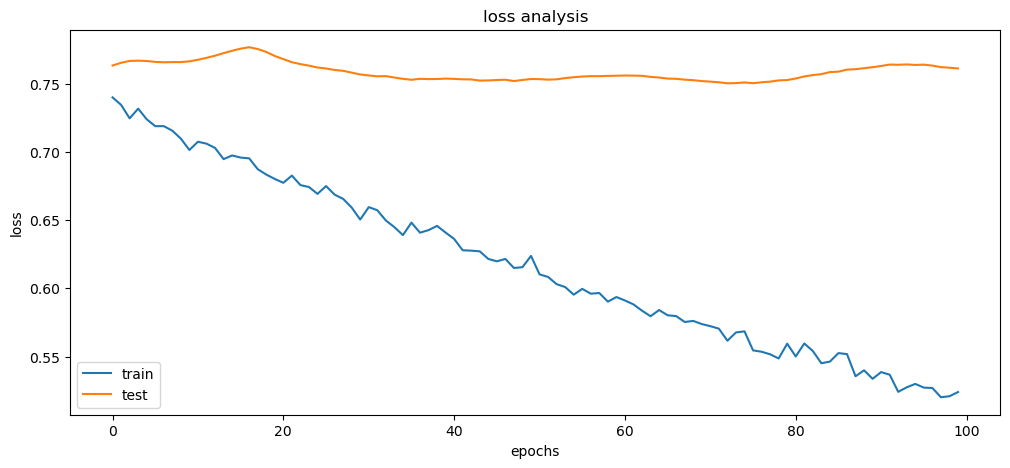

In [86]:
plt.figure(figsize=(12,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train','test'])
plt.title('loss analysis')
plt.show()

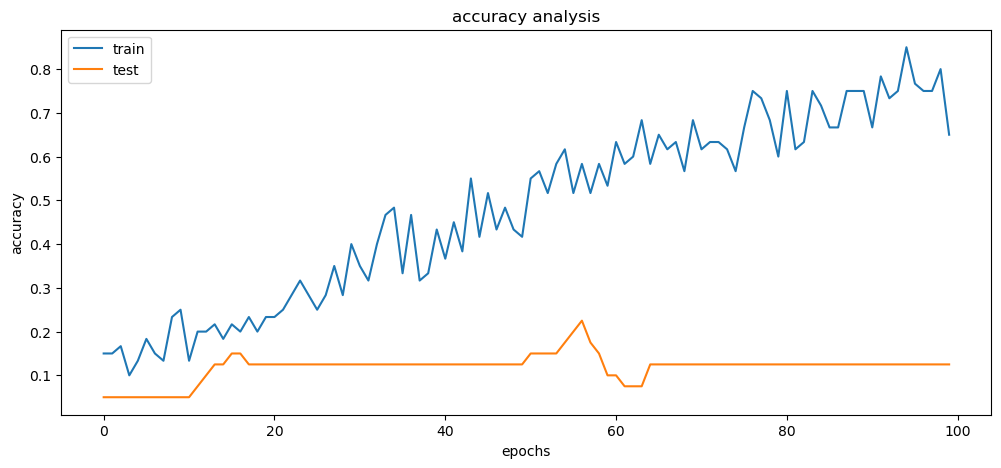

In [87]:
plt.figure(figsize=(12,5))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train','test'])
plt.title('accuracy analysis')
plt.show()

In [90]:
prediction = model.predict(x_test)

4/4 [==============================] - 2s 110ms/step


In [94]:
submit = pd.read_csv("breast_cancer/sample.csv", index_col="ID")
print(submit.shape)
submit.head()

(100, 1)


,N_category
ID,
BC_01_0011,0
BC_01_0220,0
BC_01_0233,0
BC_01_0258,0
BC_01_0260,0


In [95]:
submit["N_category"] = prediction.astype(float).tolist()
submit.to_csv("cancer_Jihye.csv")

In [96]:
submitted = pd.read_csv("cancer_Jihye.csv")
submitted.head(2)

,ID,N_category
0,BC_01_0011,"[0.7151108980178833, 0.5020720958709717, 0.761..."
1,BC_01_0220,"[0.6220657229423523, 0.45452845096588135, 0.35..."
